#  WeRateDogs Data Wrangling Project by Jawza Alotaibi 
***


In [1]:
# Importing the required libraries 
import pandas as pd
import numpy as np
import datetime as dt
import requests
import os
import tweepy
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

% matplotlib inline

## Introduction:

<p style="color:green"> WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. During this project I will perform the data wrangling steps on the WeRateDogs data (gathering, assessing and cleaning). Next, I will analysis the cleaned dataset to find interesting observations and visualize them. </p>






## - Gathering

<p style="color:green"> For this project we will gather the data from three resources : </p>

<p style="color:green"> *  Enhanced Twitter Archive CSV file : that already prepped and downloaded manually from Udacity.</p>

<p style="color:green"> *  The tweet image predictions : hosted on Udacity's servers and downloaded programmatically using the Requests library.</p>

<p style="color:green"> *  Twitter API : Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library. </p>


### 1- Enhanced Twitter Archive CSV file:

In [2]:
# read the enhanced twitter archive in tweet_arch_df 
tweet_arch_df = pd.read_csv('twitter-archive-enhanced.csv')
tweet_arch_df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


### 2- The tweet image predictions :


In [3]:
# create folder for the image_predictions.tsv file
folder_name = 'img_prediction'

if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# store the url for image_predictions.tsv file that  hosted on Udacity's servers
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

# user requsts library to downloaded image_predictions.tsv file
response = requests.get(url)
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)


In [3]:
#  read image_predictions.tsv in img_prediction_df
img_prediction_df = pd.read_csv('img_prediction/image-predictions.tsv', sep='\t')
img_prediction_df.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


### 3- Twitter API:


In [8]:
#Authentication for accessing twitter API
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

#creating an OAuthHandler instance
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth ,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

In [9]:
# use Twitter's API to retrieve data for each tweet ID in tweet_arch_df
# get each tweet id from tweet_arch_df and add them in arch_tweet_ids list
arch_tweet_ids = list(tweet_arch_df.tweet_id)

valid_tweet_ids= []  #available tweet 
unvalid_tweet_ids = {} # unavailable
tweet_data= {}
start = timer() # start timer to calculate the execution time


for tweet_id in arch_tweet_ids :
    try:
        tweet = api.get_status(tweet_id, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
        tweet_data[tweet_id] = tweet._json
        valid_tweet_ids.append(tweet_id)
    except tweepy.TweepError as e:
            unvalid_tweet_ids[tweet_id]= e


            
end = timer()
print('Execution Time (s) : ' + str(end - start)) # Time in seconds
print('Number of valied ID: ' + str(len(valid_tweet_ids)))
print('Number of unvalied ID: ' + str(len(unvalid_tweet_ids)))
print(unvalid_tweet_ids)

Rate limit reached. Sleeping for: 734
Rate limit reached. Sleeping for: 734
Execution Time (s) : 1912.8686675059998
Number of valied ID: 2339
Number of unvalied ID: 17
{888202515573088257: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 873697596434513921: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 872668790621863937: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 872261713294495745: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 869988702071779329: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 866816280283807744: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 861769973181624320: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 845459076796616705: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 842892208864923648: TweepError([{'code': 144, 'message': 'No status found with 

<p style="color:green"> From above we can see that the there are 17 tweet ID that no longer exist. </p>

In [10]:
#Save JSON to text file tweet_json
with open('tweet_json.txt', 'w') as outfile:  
    json.dump(tweet_data, outfile, 
              sort_keys = True,
              indent=4,
              ensure_ascii = False)



,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
1991-02-08 13:48:08.022790149,NaN,NaN,2015-11-15 22:32:08,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/BL...,2518,0,NaN,666020888022790144,666020888022790144,...,NaN,NaN,NaN,496,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 16:08:05.002620928,NaN,NaN,2015-11-15 23:05:30,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/r7...,125,0,NaN,666029285002620928,666029285002620928,...,NaN,NaN,NaN,46,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,0,"{'contributors_enabled': False, 'created_at': ..."


In [4]:
# read the tweet json text file into panda df
tweet_df=pd.read_json('tweet_json.txt' , orient='index')
tweet_df.head(2)

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
1991-02-08 13:48:08.022790149,NaN,NaN,2015-11-15 22:32:08,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/BL...,2518,0,NaN,666020888022790144,666020888022790144,...,NaN,NaN,NaN,496,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 16:08:05.002620928,NaN,NaN,2015-11-15 23:05:30,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/r7...,125,0,NaN,666029285002620928,666029285002620928,...,NaN,NaN,NaN,46,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,0,"{'contributors_enabled': False, 'created_at': ..."


## - Assessing
<p style="color:green"> During this part we will assess our three data frames
to identify data quality issues  and lack of tidiness  </p>


### 1. Assessing tweet_arch_df :

In [5]:
#dispaly tweet_arch_df
tweet_arch_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [6]:
tweet_arch_df.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1007,747600769478692864,NaN,NaN,2016-06-28 01:21:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bookstore and Seaweed. Bookstore is ti...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747600769...,10,10,Bookstore,None,None,None,None
214,851464819735769094,NaN,NaN,2017-04-10 16:00:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Iggy. He was a rescue dog killed in th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/851464819...,14,10,Iggy,None,None,None,None
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
2216,668537837512433665,NaN,NaN,2015-11-22 21:13:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Spark. He's nervous. Other dog hasn't ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668537837...,8,10,Spark,None,None,None,None
1001,747933425676525569,NaN,NaN,2016-06-28 23:23:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Pls don't send more sherks. I don't care how s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747933425...,11,10,None,None,None,None,None
752,778990705243029504,NaN,NaN,2016-09-22 16:13:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jay. He's really h*ckin happy about th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778990705...,11,10,Jay,None,None,None,None
2145,669926384437997569,NaN,NaN,2015-11-26 17:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've never seen a dog so genuinely happy about...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669926384...,12,10,None,None,None,None,None
1426,697881462549430272,NaN,NaN,2016-02-11 20:34:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Carter. He wakes up in the morning and...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697881462...,10,10,Carter,None,None,None,None
507,812709060537683968,NaN,NaN,2016-12-24 17:18:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Brandi and Harley. They are practicing...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/812709060...,12,10,Brandi,None,None,None,None
538,806620845233815552,NaN,NaN,2016-12-07 22:06:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Idk why this keeps happening. W...,7.815247e+17,4.196984e+09,2016-09-29 16:03:01 +0000,https://twitter.com/dog_rates/status/781524693...,12,10,None,None,None,None,None


In [7]:
tweet_arch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
tweet_arch_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [9]:
tweet_arch_df[tweet_arch_df.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [10]:
tweet_arch_df[tweet_arch_df.text.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [12]:
tweet_arch_df[tweet_arch_df.expanded_urls.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
75,878281511006478336,NaN,NaN,2017-06-23 16:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Shadow. In an attempt to reach maximum zo...,NaN,NaN,NaN,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
76,878057613040115712,NaN,NaN,2017-06-23 01:10:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Emmy. She was adopted today. Massive r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
98,873213775632977920,NaN,NaN,2017-06-09 16:22:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sierra. She's one precious pupper. Abs...,NaN,NaN,NaN,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
126,868552278524837888,NaN,NaN,2017-05-27 19:39:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Cooper. His expression is the sam...,NaN,NaN,NaN,"https://www.gofundme.com/3ti3nps,https://twitt...",12,10,Cooper,None,None,None,None
135,866450705531457537,NaN,NaN,2017-05-22 00:28:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jamesy. He gives a kiss to every other...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/866450705...,13,10,Jamesy,None,None,pupper,None
136,866334964761202691,NaN,NaN,2017-05-21 16:48:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Coco. At first I thought she was a clo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


In [13]:
sum(tweet_arch_df.expanded_urls.isnull())

59

In [14]:
sum(tweet_arch_df.retweeted_status_id.notnull())

181

In [15]:
tweet_arch_df[tweet_arch_df.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [16]:
sum(tweet_arch_df.in_reply_to_user_id.notnull())

78

In [17]:
tweet_arch_df[tweet_arch_df.in_reply_to_user_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None


In [18]:
len(tweet_arch_df.name.value_counts())

957

In [19]:
tweet_arch_df.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Cooper        11
Oliver        11
Tucker        10
Lola          10
Penny         10
Bo             9
Winston        9
Sadie          8
the            8
Daisy          7
Toby           7
Bailey         7
Buddy          7
an             7
Stanley        6
Oscar          6
Jack           6
Koda           6
Leo            6
Dave           6
Milo           6
Bella          6
Rusty          6
Jax            6
Scout          6
Larry          5
            ... 
Venti          1
Bowie          1
Oddie          1
Josep          1
Ronduh         1
Sparky         1
Fido           1
Nico           1
Flurpson       1
Traviss        1
Meera          1
Arlo           1
Marlee         1
Raphael        1
Maya           1
Ulysses        1
Billl          1
Stark          1
Enchilada      1
Bayley         1
Sunshine       1
Carbon         1
Tedders        1
O              1
Izzy           1
Teddy          1
Mitch          1
Gerbald       

In [21]:
df=tweet_arch_df[tweet_arch_df['name'].str[0].str.islower()]
df.name.value_counts()

a               55
the              8
an               7
very             5
just             4
one              4
quite            4
actually         2
getting          2
mad              2
not              2
such             1
this             1
incredibly       1
by               1
all              1
light            1
officially       1
life             1
his              1
my               1
old              1
space            1
infuriating      1
unacceptable     1
Name: name, dtype: int64

In [22]:
tweet_arch_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [23]:
tweet_arch_df.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [24]:
tweet_arch_df.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [25]:
tweet_arch_df.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [27]:
tweet_arch_df.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [28]:
tweet_arch_df [ tweet_arch_df['rating_numerator'] > 15]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None


In [29]:
tweet_arch_df[ tweet_arch_df['rating_denominator'] > 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


### 2. Assessing img_prediction_df_1 :


In [30]:
#dispaly img_prediction_df
img_prediction_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [31]:
img_prediction_df.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1195,740365076218183684,https://pbs.twimg.com/media/CkZOGhJWsAAHvPv.jpg,1,bow_tie,0.246313,False,Windsor_tie,0.172446,False,mushroom,0.137516,False
1831,836380477523124226,https://pbs.twimg.com/media/C5trm6iWgAQ22Hw.jpg,1,wooden_spoon,0.082489,False,sliding_door,0.061017,False,grand_piano,0.055086,False
280,671115716440031232,https://pbs.twimg.com/media/CVBILUgVAAA1ZUr.jpg,1,malinois,0.406341,True,kelpie,0.143366,True,dingo,0.129802,False
1732,821149554670182400,https://pbs.twimg.com/ext_tw_video_thumb/82114...,1,German_shepherd,0.515933,True,malinois,0.203651,True,Irish_setter,0.091055,True
790,690649993829576704,https://pbs.twimg.com/media/CZWugJsWYAIzVzJ.jpg,1,bighorn,0.215438,False,hyena,0.137928,False,Mexican_hairless,0.098171,True
834,694001791655137281,https://pbs.twimg.com/media/CaGW8JQUMAEVtLl.jpg,1,Pembroke,0.769999,True,Cardigan,0.229228,True,Chihuahua,0.000247,True
1542,791312159183634433,https://pbs.twimg.com/media/CvtONV4WAAAQ3Rn.jpg,4,miniature_pinscher,0.892925,True,toy_terrier,0.095524,True,Doberman,0.003544,True
1095,720043174954147842,https://pbs.twimg.com/media/Cf4bcm8XEAAX4xV.jpg,1,Samoyed,0.954517,True,Eskimo_dog,0.029130,True,white_wolf,0.004462,False
1108,723688335806480385,https://pbs.twimg.com/media/CgsOszGW0AAruKp.jpg,2,teddy,0.263256,False,chow,0.089010,True,Irish_terrier,0.065306,True
1350,759793422261743616,https://pbs.twimg.com/media/CotUFZEWcAA2Pku.jpg,2,golden_retriever,0.985876,True,Labrador_retriever,0.001948,True,kuvasz,0.001752,True


In [32]:
img_prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [33]:
img_prediction_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [34]:
img_prediction_df[img_prediction_df.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [35]:
img_prediction_df[img_prediction_df.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1364,761371037149827077,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False
1368,761750502866649088,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.398260,True,kuvasz,0.005410,True
1387,766078092750233600,https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg,1,toy_poodle,0.420463,True,miniature_poodle,0.132640,True,Chesapeake_Bay_retriever,0.121523,True
1407,770093767776997377,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
1417,771171053431250945,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True


In [36]:
img_prediction_df.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [37]:
img_prediction_df.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [38]:
img_prediction_df.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [39]:
false_img_prediction_df = img_prediction_df [( img_prediction_df['p1_dog'] == False) & ( img_prediction_df['p2_dog'] == False) & ( img_prediction_df['p3_dog'] == False) ]
false_img_prediction_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,5.514170e-05,False,acorn,2.625800e-05,False
50,666837028449972224,https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg,1,triceratops,0.442113,False,armadillo,1.140710e-01,False,common_iguana,4.325530e-02,False
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.589446,False,chain_saw,1.901420e-01,False,wig,3.450970e-02,False
53,667012601033924608,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,hyena,0.987230,False,African_hunting_dog,1.260080e-02,False,coyote,5.735010e-05,False


### 3. Assessing tweet_df_1 :

In [40]:
#dispaly tweet_df
tweet_df

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
1991-02-08 13:48:08.022790149,NaN,NaN,2015-11-15 22:32:08,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/BL...,2518,0,NaN,666020888022790144,666020888022790144,...,NaN,NaN,NaN,496,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 16:08:05.002620928,NaN,NaN,2015-11-15 23:05:30,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/r7...,125,0,NaN,666029285002620928,666029285002620928,...,NaN,NaN,NaN,46,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 17:16:52.701032449,NaN,NaN,2015-11-15 23:21:54,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/y6...,121,0,NaN,666033412701032448,666033412701032448,...,NaN,NaN,NaN,43,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 20:17:06.329800704,NaN,NaN,2015-11-16 00:04:52,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/DW...,290,0,NaN,666044226329800704,666044226329800704,...,NaN,NaN,NaN,136,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 21:40:48.165822465,NaN,NaN,2015-11-16 00:24:50,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/4B...,105,0,NaN,666049248165822464,666049248165822464,...,NaN,NaN,NaN,42,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 22:05:58.794694657,NaN,NaN,2015-11-16 00:30:50,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/fv...,130,0,NaN,666050758794694656,666050758794694656,...,NaN,NaN,NaN,57,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 22:24:13.826850816,NaN,NaN,2015-11-16 00:35:11,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/v5...,1192,0,NaN,666051853826850816,666051853826850816,...,NaN,NaN,NaN,828,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 23:25:25.042405380,NaN,NaN,2015-11-16 00:49:46,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/rd...,426,0,NaN,666055525042405376,666055525042405376,...,NaN,NaN,NaN,235,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 23:51:30.499244032,NaN,NaN,2015-11-16 00:55:59,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/yW...,286,0,NaN,666057090499244032,666057090499244032,...,NaN,NaN,NaN,138,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-09 00:16:40.524156928,NaN,NaN,2015-11-16 01:01:59,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/pY...,109,0,NaN,666058600524156928,666058600524156928,...,NaN,NaN,NaN,57,0,NaN,"<a href=""htt

In [41]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2339 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2339 non-null datetime64[ns]
entities                         2339 non-null object
extended_entities                1821 non-null object
favorite_count                   2339 non-null int64
favorited                        2339 non-null int64
geo                              0 non-null float64
id                               2339 non-null int64
id_str                           2339 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null float64
is_quote_status                  23

In [42]:
tweet_df[tweet_df.id.duplicated()]

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user


In [43]:
tweet_df['retweet_count'].describe()

count     2339.000000
mean      2896.316802
std       4884.762694
min          1.000000
25%        582.000000
50%       1352.000000
75%       3375.000000
max      82814.000000
Name: retweet_count, dtype: float64

In [44]:
tweet_df['favorite_count'].describe()

count      2339.000000
mean       7882.975631
std       12216.229961
min           0.000000
25%        1365.000000
50%        3429.000000
75%        9653.000000
max      162738.000000
Name: favorite_count, dtype: float64

In [45]:
tweet_df.favorited.value_counts()

0    2339
Name: favorited, dtype: int64

In [46]:
tweet_df.retweeted.value_counts()

0    2339
Name: retweeted, dtype: int64

1. ### tweet_arch_df:
    - ### Quality Issues:
        - in_reply_to_user_id has many null.
        - in_reply_to_status_id has many null .
        - in_reply_to_user_id , in_reply_to_status_id , retweeted_status_id  and retweeted_status_user_id  are float not int.
        - Wrong dog names (a , an , the , such).
        - Dogs names with symbol Gأ²rdأ³n , Devأ³n , Ralphأ© , Oliviأ©r , Amأ©lie , Flأ،vio and Frأ¶nq.
        - There are retweet and replays in the tweet_arch_df that may result in misleading and redundant rating for same tweet indirectly.
        - have two dog stage for same dog.
        - expend url in tweet_arch_df is duplicated for jpg_url in img_prediction_df.
        - duplicated expend url in the same recored.
        - duplicated expend url in tweet_arch_df.
        - source column url can be categorizes like iPhone Twitter, TweetDeck , Twitter Web Client and Vine.
        - source has html code with the url.
        - Timestamp is string not date time.
        - huge number in rating_numerator & rating_denominator, since they are  humour tweets some of them are right ratings and other were wrong and captured from other numbers that mentioned in the tweets but not for rating .
        - None value insted of NaN.
        - less than 621 with dog stage values.
        - Undescriptive column names expend url
    
    - ### Tidiness Issues:
        - Many column for dog stages insted of one .
        - Timestamp has date with time
       
        
2. ### img_prediction_df:
    - ### Quality Issues:
        - duplicated jpg_url.
        - Dog breed name with upper first letter and other without.
        - Dog breed name with '_' .
        - Undescriptive column names .
        - Records with False prediction for all algorithms.
       
    - ### Tidiness Issues:
        - Image algorithms prediction column the dog breed with false results presented.       
    

3. ### tweet_df:

    - ### Quality Issues:
        - Html code in multiple column like source , entities.
        - Undescriptive column names id .

    - ### Tidiness Issues:
        - repeated column like id and id_str.
        - Most columns in  tweet_df are duplicate of tweet_arch_df columns.
        
    

In [5]:
# Create copies of original dataframes
clean_tweet_arch_df =tweet_arch_df.copy()
clean_img_prediction_df = img_prediction_df.copy()
clean_tweet_df= tweet_df.copy()


## - Cleaning:

During the assessment I found many issue and in this cleanning section I will clean the
    below issues: 
    
   - ### Quality Issues:
        - Undescriptive column name id in tweet_df  .
        - Undescriptive column names expend url in tweet_arch_df.
        - There are retweet and replays in the tweet_arch_df that may result in misleading and redundant rating for same tweet. so, original tweet will be keep it for accurate investigation result.
        - Records with False prediction for all algorithms.
        - Wrong dog names (a , an , the , such).
        - have two dog stage for same dog.
        - source column url has html code and can be categorizes like iPhone Twitter, TweetDeck , Twitter Web Client and Vine.
        - Timestamp is string not date time.
        - None value insted of NaN.
        - huge number in rating_numerator & rating_denominator, since they are humour tweets some of them are right ratings and other were wrong and captured from other numbers that mentioned in the tweets but not for rating .
        - Dog breed name with upper first letter and other without in img_prediction_df .
        - Dog breed name with ' _ ' in img_prediction_df .



     
      

   - ### Tidiness Issues:
        - Many column for dog stages insted of one .
        - timestamp split timestamp into two column date and time in tweet_arch_df.
        - Image algorithms prediction columns for the dog breed with false results presented.
        - Most columns in  tweet_df are duplicate of tweet_arch_df columns.
        - columns that repeated and that don't provide useful information for our we rate dog tweet exploration like in_reply_to_user_id , in_reply_to_status_id , retweeted_status_id  and retweeted_status_user_id and jpg_url.
        


- ## Tidiness Issues:


## 1. img_prediction_df:

#### Defined:
Remove  records with false values in all of the three algorithm. Since the image prediction for the dog breed led to no result. Some of those records are indeed not a dog but also there dog image with unclear image position when it was taken, so since the perdiction algorithm access not provided , records with false values will be removed.

#### Code :


In [6]:
# Remove records with false values in P1 P2 P3 
clean_img_prediction_df = clean_img_prediction_df [( clean_img_prediction_df['p1_dog'] == True) | ( clean_img_prediction_df['p2_dog'] == True) | ( clean_img_prediction_df['p3_dog'] == True) ].copy()

#### Test :

In [7]:
len(clean_img_prediction_df)

1751

In [7]:
false_img_prediction_df = clean_img_prediction_df [( clean_img_prediction_df['p1_dog'] == False) & ( clean_img_prediction_df['p2_dog'] == False) & ( clean_img_prediction_df['p3_dog'] == False) ]
false_img_prediction_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


#### Defined:
Add column with the most predicted for dog breed. This column will capture algorithm with higher confidence result,and will summrize 9 columns into one with the algorithm most confidence dog breed result.

#### Code :

In [8]:
# Creat new column dog_breed that hold the most predicted dog breed
clean_img_prediction_df.loc[clean_img_prediction_df.p1_dog == True, 'dog_breed'] = clean_img_prediction_df['p1']
clean_img_prediction_df.loc[(clean_img_prediction_df.p2_dog == True) & (clean_img_prediction_df.p1_dog == False), 'dog_breed'] = clean_img_prediction_df['p2']
clean_img_prediction_df.loc[(clean_img_prediction_df.p3_dog == True) & ( clean_img_prediction_df.p1_dog == False )& (clean_img_prediction_df.p2_dog == False), 'dog_breed'] = clean_img_prediction_df['p3']


#### Test :

In [10]:
clean_img_prediction_df.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed
477,675166823650848770,https://pbs.twimg.com/media/CV6spB7XAAIpMyP.jpg,1,llama,0.284394,False,standard_poodle,0.132569,True,teddy,0.127975,False,standard_poodle
973,706681918348251136,https://pbs.twimg.com/media/Cc6jcYRXIAAFuox.jpg,1,toy_poodle,0.717584,True,miniature_poodle,0.151433,True,Norwich_terrier,0.047087,True,toy_poodle
34,666435652385423360,https://pbs.twimg.com/media/CT-nsTQWEAEkyDn.jpg,1,Chesapeake_Bay_retriever,0.184130,True,chain_saw,0.056775,False,power_drill,0.036763,False,Chesapeake_Bay_retriever
1518,787397959788929025,https://pbs.twimg.com/media/Cu1mQsDWEAAU_VQ.jpg,1,Chihuahua,0.900483,True,toy_terrier,0.021084,True,miniature_pinscher,0.019484,True,Chihuahua
809,692158366030913536,https://pbs.twimg.com/media/CZsKVxfWQAAXy2u.jpg,1,pug,0.956565,True,swing,0.018907,False,toy_poodle,0.013544,True,pug
886,699036661657767936,https://pbs.twimg.com/media/CbN6IW4UYAAyVDA.jpg,1,Chihuahua,0.222943,True,toyshop,0.179938,False,Weimaraner,0.163033,True,Chihuahua
624,680609293079592961,https://pbs.twimg.com/media/CXICiB9UwAE1sKY.jpg,1,French_bulldog,0.700764,True,Chihuahua,0.072390,True,American_Staffordshire_terrier,0.039619,True,French_bulldog
345,672272411274932228,https://pbs.twimg.com/media/CVRkLuJWUAAhhYp.jpg,2,pug,0.914685,True,Norwegian_elkhound,0.014982,True,Siamese_cat,0.009221,False,pug
1188,739544079319588864,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False,Labrador_retriever
1708,817827839487737858,https://pbs.twimg.com/ext_tw_video_thumb/81782...,1,cocker_spaniel,0.387608,True,golden_retriever,0.264844,True,Pekinese,0.122123,True,cocker_spaniel


#### Defined:
keep  only tweet ID , img_num and dog breed in clean_img_prediction_df where it summrized the other columns (algorithm) into dog breed column, and  jpg_url repeated column for expanded_urls in tweet_arch_df.

#### Code :


In [9]:
clean_img_prediction_df= clean_img_prediction_df[['tweet_id','dog_breed', 'img_num']] #add only tweet id , img_num and dog_breed in clean_img_prediction_df

#### Test :

In [10]:
clean_img_prediction_df.head(2)

,tweet_id,dog_breed,img_num
0,666020888022790149,Welsh_springer_spaniel,1
1,666029285002620928,redbone,1


## 2. tweet_df:

#### Defined:
Remove replay that may result in misleading and redundant rating for same tweet.


#### Code :

In [11]:
# Remove  replay records 
clean_tweet_df = clean_tweet_df [clean_tweet_df.in_reply_to_status_id.isnull()]

#### Test :

In [12]:
sum(clean_tweet_df.in_reply_to_status_id.notnull())


0

#### Defined:
keep only tweet ID , retweet_count and favorite_count in clean_tweet_df where other columns repeated tweet info that already in clean_tweet_arch_df and other extra column that don't provide useful information for our we rate dog tweet exploration like in_reply_to_user_id , in_reply_to_status_id , retweeted_status_id  and retweeted_status_user_id.
        


#### Code :


In [13]:

clean_tweet_df = clean_tweet_df.reset_index()[['id','favorite_count','retweet_count']].copy()


#### Test :

In [14]:
clean_tweet_df.head(10)

,id,favorite_count,retweet_count
0,666020888022790144,2518,496
1,666029285002620928,125,46
2,666033412701032448,121,43
3,666044226329800704,290,136
4,666049248165822464,105,42
5,666050758794694656,130,57
6,666051853826850816,1192,828
7,666055525042405376,426,235
8,666057090499244032,286,138
9,666058600524156928,109,57


#### Defined:
Rename id column to tweet_id for consistency

#### Code :

In [15]:
# rename id column to tweet_id
clean_tweet_df.rename(columns={'id':'tweet_id'}, inplace=True)

#### Test :


In [16]:
clean_tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2262 entries, 0 to 2261
Data columns (total 3 columns):
tweet_id          2262 non-null int64
favorite_count    2262 non-null int64
retweet_count     2262 non-null int64
dtypes: int64(3)
memory usage: 53.1 KB


## 3. tweet_arch_df:

#### Defined:
Remove retweet and replay that may result in misleading and redundant rating for same tweet. Also, tweet without Images where our tweet is about image ratings.


#### Code :

In [17]:
clean_tweet_arch_df = clean_tweet_arch_df [clean_tweet_arch_df.in_reply_to_status_id.isnull()] #remove replay record
clean_tweet_arch_df = clean_tweet_arch_df [clean_tweet_arch_df.retweeted_status_id.isnull()] # remove retweet
clean_tweet_arch_df = clean_tweet_arch_df [clean_tweet_arch_df.expanded_urls.notnull()].copy() # remove tweet without image

#### Test :

In [18]:

p1=sum(clean_tweet_arch_df.in_reply_to_status_id.notnull())
p2=sum(clean_tweet_arch_df.expanded_urls.isnull())
p3=sum(clean_tweet_arch_df.retweeted_status_id.notnull())
print(p1,p2,p3)


0 0 0


#### Defined:
convert timestamp to datetime and  split it into two column date and time



#### Code :

In [19]:
clean_tweet_arch_df['timestamp'] = pd.to_datetime(clean_tweet_arch_df['timestamp']) #conver to datetime
clean_tweet_arch_df['date']= clean_tweet_arch_df['timestamp'].dt.date   # create date column
clean_tweet_arch_df['time']= clean_tweet_arch_df['timestamp'].dt.time  #creat time column

#### Test :

In [20]:
clean_tweet_arch_df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-08-01,16:23:56
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017-08-01,00:17:27


#### Defined:
Join 4 column for dog stages into one one column called dog_stage. before that we will


#### Code :


In [21]:
clean_tweet_arch_df['dog_stage'] = clean_tweet_arch_df[['doggo', 'floofer','pupper', 'puppo']].apply(lambda x:''.join(x), axis= 1)

In [22]:
clean_tweet_arch_df.dog_stage.unique()

array(['NoneNoneNoneNone', 'doggoNoneNoneNone', 'NoneNoneNonepuppo',
       'NoneNonepupperNone', 'NoneflooferNoneNone', 'doggoNoneNonepuppo',
       'doggoflooferNoneNone', 'doggoNonepupperNone'], dtype=object)

In [23]:
clean_tweet_arch_df.dog_stage = clean_tweet_arch_df.dog_stage.apply(lambda x:x.replace('None',''))
clean_tweet_arch_df.dog_stage = clean_tweet_arch_df.dog_stage.apply(lambda x:x.replace('doggopuppo','multiple'))
clean_tweet_arch_df.dog_stage = clean_tweet_arch_df.dog_stage.apply(lambda x:x.replace('doggofloofer','multiple'))
clean_tweet_arch_df.dog_stage = clean_tweet_arch_df.dog_stage.apply(lambda x:x.replace('doggopupper','multiple'))


clean_tweet_arch_df.drop(['doggo', 'floofer','pupper', 'puppo'],  axis=1, inplace=True)

#### Test :

In [24]:
clean_tweet_arch_df.dog_stage.value_counts()

            1759
pupper       220
doggo         72
puppo         23
multiple      11
floofer        9
Name: dog_stage, dtype: int64

In [25]:
clean_tweet_arch_df.replace('', np.nan, inplace=True)  #replace empty string with null 
clean_tweet_arch_df.replace('None', np.nan, inplace=True)  # for consistency replace None with null 
clean_tweet_arch_df.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,date,time,dog_stage
2235,668171859951755264,NaN,NaN,2015-11-21 20:59:20,"<a href=""http://twitter.com/download/iphone"" r...",This is a Trans Siberian Kellogg named Alfonso...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668171859...,7,10,a,2015-11-21,20:59:20,NaN
1601,686003207160610816,NaN,NaN,2016-01-10 01:54:44,"<a href=""http://twitter.com/download/iphone"" r...",This is Hammond. He's a peculiar pup. Loves lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686003207...,3,10,Hammond,2016-01-10,01:54:44,NaN
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,2016-04-03,01:36:11,NaN
2199,668779399630725120,NaN,NaN,2015-11-23 13:13:28,"<a href=""http://twitter.com/download/iphone"" r...",This is Kevon. He is not physically or mentall...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668779399...,10,10,Kevon,2015-11-23,13:13:28,NaN
67,879376492567855104,NaN,NaN,2017-06-26 16:31:08,"<a href=""http://twitter.com/download/iphone"" r...",This is Jack AKA Stephen Furry. You're not sco...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/879376492...,12,10,Jack,2017-06-26,16:31:08,NaN
1500,692158366030913536,NaN,NaN,2016-01-27 01:33:08,"<a href=""http://twitter.com/download/iphone"" r...",This is Edgar. He's a Sassafras Puggleflash. N...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/692158366...,10,10,Edgar,2016-01-27,01:33:08,NaN
1327,705975130514706432,NaN,NaN,2016-03-05 04:36:02,"<a href=""http://twitter.com/download/iphone"" r...",This is Adele. Her tongue flies out of her mou...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/705975130...,10,10,Adele,2016-03-05,04:36:02,pupper
395,825535076884762624,NaN,NaN,2017-01-29 02:44:34,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very loving and accepting puppo. Appe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825535076...,14,10,NaN,2017-01-29,02:44:34,puppo
2193,668902994700836864,NaN,NaN,2015-11-23 21:24:36,"<a href=""http://twitter.com/download/iphone"" r...",Meet Lambeau. He's a Whistling Haiku from the ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668902994...,11,10,Lambeau,2015-11-23,21:24:36,NaN
796,773247561583001600,NaN,NaN,2016-09-06 19:52:39,"<a href=""http://twitter.com/download/iphone"" r...",This is Chip. He's a pupholder. Comes with the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/773247561...,10,10,Chip,2016-09-06,19:52:39,NaN


#### Defined:
Drop extra columns (in_reply_to_status_id , in_reply_to_user_id , timestamp , retweeted_status_id	retweeted_status_user_id	retweeted_status_timestamp	)

#### Code :

In [26]:
clean_tweet_arch_df.drop(['in_reply_to_status_id' , 'in_reply_to_user_id' , 'timestamp' , 'retweeted_status_id' ,'retweeted_status_user_id', 'retweeted_status_timestamp'],  axis=1, inplace=True)

#### Test :

In [27]:
clean_tweet_arch_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2094 non-null int64
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  1494 non-null object
date                  2094 non-null object
time                  2094 non-null object
dog_stage             335 non-null object
dtypes: int64(3), object(7)
memory usage: 180.0+ KB


## - Merge clean_tweet_arch_df & clean_tweet_df  :

#### Defined:
Both clean_tweet_arch_df & clean_tweet_df describe tweet characteristic , so it should be merged into one tweet info data frame.
#### Code :


In [28]:
twitter_archive_master_df =  pd.merge(clean_tweet_arch_df, clean_tweet_df, how= 'inner', on= 'tweet_id')


#### Test:

In [29]:
twitter_archive_master_df.sample(2)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,date,time,dog_stage,favorite_count,retweet_count
722,703407252292673536,"<a href=""http://twitter.com/download/iphone"" r...",This pupper doesn't understand gates. 10/10 so...,https://twitter.com/dog_rates/status/703407252...,10,10,NaN,2016-02-27,02:32:12,pupper,2543,732
403,762699858130116608,"<a href=""http://twitter.com/download/iphone"" r...",This is Leela. She's a Fetty Woof. Lost eye wh...,https://twitter.com/dog_rates/status/762699858...,11,10,Leela,2016-08-08,17:19:51,NaN,12774,3879


In [59]:
twitter_archive_master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1367 entries, 0 to 1366
Data columns (total 12 columns):
tweet_id              1367 non-null int64
source                1367 non-null object
text                  1367 non-null object
expanded_urls         1367 non-null object
rating_numerator      1367 non-null int64
rating_denominator    1367 non-null int64
name                  958 non-null object
date                  1367 non-null object
time                  1367 non-null object
dog_stage             225 non-null object
favorite_count        1367 non-null int64
retweet_count         1367 non-null int64
dtypes: int64(5), object(7)
memory usage: 138.8+ KB


## -Quality Issues:

#### Defined:
Rename expanded_urls column to image_urls.


#### Code :

In [30]:
# rename expanded_urls column to image_urls
twitter_archive_master_df.rename(columns={'expanded_urls':'image_urls'}, inplace=True)

#### Test :

In [31]:
twitter_archive_master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1367 entries, 0 to 1366
Data columns (total 12 columns):
tweet_id              1367 non-null int64
source                1367 non-null object
text                  1367 non-null object
image_urls            1367 non-null object
rating_numerator      1367 non-null int64
rating_denominator    1367 non-null int64
name                  958 non-null object
date                  1367 non-null object
time                  1367 non-null object
dog_stage             225 non-null object
favorite_count        1367 non-null int64
retweet_count         1367 non-null int64
dtypes: int64(5), object(7)
memory usage: 138.8+ KB



#### Defined:
Wrong dog names (a , an , the , such, quite,just ,one , getting ,not , mad , actually , his , light, old , my , incredibly , space , by , such , unacceptable ,this , officially, life ,infuriating ,all).


#### Code :

In [32]:
# replacy  wrong  names with null
wrong_name_list = ['a' , 'an' , 'the' , 'such', 'quite','just' ,'one' , 'getting' ,'not' , 'mad' , 'actually' , 'his' , 'light', 'old' , 'my' , 'incredibly' , 'space' , 'by' , 'such' , 'unacceptable' ,'this' , 'officially', 'life' ,'infuriating' ,'all']
twitter_archive_master_df.name = twitter_archive_master_df.name.apply(lambda x: np.nan if x in wrong_name_list else x)



#### Test:

In [33]:
twitter_archive_master_df.name.value_counts()

Oliver      8
Tucker      7
Winston     7
Lucy        7
Lola        6
Cooper      6
Penny       6
Sadie       5
Bailey      5
Bella       5
Toby        5
Dexter      4
Sophie      4
Clark       4
Clarence    4
Stanley     3
Koda        3
Chip        3
Scout       3
Derek       3
Bo          3
Louis       3
Malcolm     3
Boomer      3
Winnie      3
Gus         3
Ellie       3
Larry       3
Leo         3
Riley       3
           ..
Jonah       1
Amélie      1
Rorie       1
Mauve       1
Torque      1
Strudel     1
Berb        1
Ginger      1
Arnie       1
Nala        1
Dewey       1
Covach      1
Walter      1
Grizzie     1
Brudge      1
Rory        1
Jessifer    1
Rocco       1
Herald      1
Apollo      1
Rinna       1
Trip        1
Bones       1
Hercules    1
Wesley      1
Indie       1
Molly       1
Durg        1
Harvey      1
Adele       1
Name: name, Length: 667, dtype: int64


#### Defined:
categorizes source column url into iPhone Twitter, TweetDeck , Twitter Web Client and Vine.



#### Code :

In [34]:
#replace source column url into iPhone Twitter, TweetDeck , Twitter Web Client and Vine.
twitter_archive_master_df.source.replace(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
                  '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
                 '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
                 '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'], 
                 ['iPhone Twitter', 'TweetDeck' , 'Twitter Web Clien' , 'Vine' ], inplace=True)

#### Test :

In [35]:
twitter_archive_master_df.source.value_counts()

iPhone Twitter       1278
TweetDeck              63
Twitter Web Clien      18
Vine                    8
Name: source, dtype: int64

#### Defined:
Remove ' _ ' in Dog breed name and capitalize the first letter of each word.



#### Code :

In [36]:
clean_img_prediction_df['dog_breed']=clean_img_prediction_df['dog_breed'].str.replace('_', " " ) # rplace _ with empty string.
clean_img_prediction_df['dog_breed']=clean_img_prediction_df['dog_breed'].str.title() # capitalize the first letter of each word.

#### Test:

In [37]:
clean_img_prediction_df.dog_breed.value_counts()

Golden Retriever                  173
Labrador Retriever                113
Pembroke                           96
Chihuahua                          95
Pug                                65
Toy Poodle                         52
Chow                               51
Samoyed                            46
Pomeranian                         42
Cocker Spaniel                     34
Malamute                           34
French Bulldog                     32
Chesapeake Bay Retriever           31
Miniature Pinscher                 26
Cardigan                           23
Staffordshire Bullterrier          22
Eskimo Dog                         22
Beagle                             21
German Shepherd                    21
Shih-Tzu                           20
Siberian Husky                     20
Maltese Dog                        19
Lakeland Terrier                   19
Rottweiler                         19
Kuvasz                             19
Shetland Sheepdog                  19
Basset      

#### Defined:
fix huge rating . There are huge numbers in rating_numerator & rating_denominator, since it's humour tweet some it's right ratings and other were wrong and captured from other numbers that mentioned in the tweet but not for rating .

#### Code :

In [38]:
p1 =twitter_archive_master_df[twitter_archive_master_df['rating_numerator'] > 20]
#232 without ratings
# 311 whit ratings 9.75 
# 351 with ratings 11.27
# 429 with ratings 165 \ 150 
# 483 wiht ratings 1776 correct for fun
# 574 with ratings 204 \ 170  
# 670 with ratings  45 \ 50
#717 with ratings  60 \ 50
# 772 with ratings 44 \ 40 
# 982 with ratings 144 \ 20 
# 1017 with ratings 88 \ 80 
# 1170 with ratings not for dog 

# I will drop 232 & 1170 where they are not dog ratings.
# i will fix 311 & 351 ratings from 75,27 into 10, 11

p1

,tweet_id,source,text,image_urls,rating_numerator,rating_denominator,name,date,time,dog_stage,favorite_count,retweet_count
232,810984652412424192,iPhone Twitter,Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,2016-12-19,23:06:23,NaN,5644,1556
311,786709082849828864,iPhone Twitter,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,2016-10-13,23:23:56,NaN,19268,6599
351,778027034220126208,iPhone Twitter,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,2016-09-20,00:24:34,pupper,6914,1750
429,758467244762497024,iPhone Twitter,Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165,150,NaN,2016-07-28,01:00:57,NaN,5027,2372
483,749981277374128128,Vine,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,2016-07-04,15:00:45,NaN,5329,2607
574,731156023742988288,iPhone Twitter,Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204,170,NaN,2016-05-13,16:15:54,NaN,3969,1339
670,709198395643068416,iPhone Twitter,"From left to right:\nCletus, Jerome, Alejandro...",https://twitter.com/dog_rates/status/709198395...,45,50,NaN,2016-03-14,02:04:08,NaN,2511,672
717,704054845121142784,iPhone Twitter,Here is a whole flock of puppers. 60/50 I'll ...,https://twitter.com/dog_rates/status/704054845...,60,50,NaN,2016-02-28,21:25:30,NaN,3032,953
772,697463031882764288,iPhone Twitter,Happy Wednesday here's a bucket of pups. 44/40...,https://twitter.com/dog_rates/status/697463031...,44,40,NaN,2016-02-10,16:51:59,NaN,3541,1457
982,677716515794329600,iPhone Twitter,IT'S PUPPERGEDDON. Total of 144/120 ...I think...,https://twitter.com/dog_rates/status/677716515...,144,120,NaN,2015-12-18,05:06:23,NaN,3148,1013


In [39]:
#we will fix the decimals ratings wrong extracted 
ratings = twitter_archive_master_df.text.str.extract('((?:\d+\.)?\d+)\/((?:\d+\.)?\d+)', expand=True)
twitter_archive_master_df['numratings']=ratings[0]  #rating_numerator
twitter_archive_master_df['dumratings']=ratings[1]    #rating_denominator

twitter_archive_master_df.drop(['rating_denominator' , 'rating_numerator' ],  axis=1, inplace=True)

twitter_archive_master_df.rename(columns={'numratings' :'rating_numerator'  , 'dumratings':'rating_denominator'}, inplace=True)

twitter_archive_master_df.rating_denominator  = twitter_archive_master_df.rating_denominator.astype(float).fillna(0.0)  # Converting strings to floats 

twitter_archive_master_df.rating_numerator  = twitter_archive_master_df.rating_numerator.astype(float).fillna(0.0)

twitter_archive_master_df[twitter_archive_master_df['tweet_id'] == 778027034220126208]


,tweet_id,source,text,image_urls,name,date,time,dog_stage,favorite_count,retweet_count,rating_numerator,rating_denominator
351,778027034220126208,iPhone Twitter,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,Sophie,2016-09-20,00:24:34,pupper,6914,1750,11.27,10.0


In [40]:
# drop 1170 with 420 ratings

twitter_archive_master_df.drop(1170, inplace=True)

In [41]:
# drop 232 with 24 ratings
twitter_archive_master_df.drop(232, inplace=True)


In [42]:
twitter_archive_master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1365 entries, 0 to 1366
Data columns (total 12 columns):
tweet_id              1365 non-null int64
source                1365 non-null object
text                  1365 non-null object
image_urls            1365 non-null object
name                  890 non-null object
date                  1365 non-null object
time                  1365 non-null object
dog_stage             225 non-null object
favorite_count        1365 non-null int64
retweet_count         1365 non-null int64
rating_numerator      1365 non-null float64
rating_denominator    1365 non-null float64
dtypes: float64(2), int64(3), object(7)
memory usage: 138.6+ KB


In [43]:
p3 =twitter_archive_master_df[(twitter_archive_master_df['rating_denominator'] > 10) & (twitter_archive_master_df['rating_numerator'] <= 20)]
# 601 with wrong ratings 13 / 10 is the correct
p3

,tweet_id,source,text,image_urls,name,date,time,dog_stage,favorite_count,retweet_count,rating_numerator,rating_denominator
601,722974582966214656,iPhone Twitter,Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,NaN,2016-04-21,02:25:47,NaN,4236,1646,4.0,20.0


In [44]:
# fix 601  ratings  into 13 /10
twitter_archive_master_df.loc[601, 'rating_numerator'] = 13
twitter_archive_master_df.loc[601, 'rating_denominator'] = 10

In [45]:
# create new column that save the ratings percentage
twitter_archive_master_df['rating_percentage'] = (twitter_archive_master_df['rating_numerator']/twitter_archive_master_df['rating_denominator']) *100

#### Test:

In [46]:
p2 =twitter_archive_master_df[twitter_archive_master_df['rating_numerator'] > 20]
p2

,tweet_id,source,text,image_urls,name,date,time,dog_stage,favorite_count,retweet_count,rating_numerator,rating_denominator,rating_percentage
429,758467244762497024,iPhone Twitter,Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,NaN,2016-07-28,01:00:57,NaN,5027,2372,165.0,150.0,110.0
483,749981277374128128,Vine,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,Atticus,2016-07-04,15:00:45,NaN,5329,2607,1776.0,10.0,17760.0
574,731156023742988288,iPhone Twitter,Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,NaN,2016-05-13,16:15:54,NaN,3969,1339,204.0,170.0,120.0
670,709198395643068416,iPhone Twitter,"From left to right:\nCletus, Jerome, Alejandro...",https://twitter.com/dog_rates/status/709198395...,NaN,2016-03-14,02:04:08,NaN,2511,672,45.0,50.0,90.0
717,704054845121142784,iPhone Twitter,Here is a whole flock of puppers. 60/50 I'll ...,https://twitter.com/dog_rates/status/704054845...,NaN,2016-02-28,21:25:30,NaN,3032,953,60.0,50.0,120.0
772,697463031882764288,iPhone Twitter,Happy Wednesday here's a bucket of pups. 44/40...,https://twitter.com/dog_rates/status/697463031...,NaN,2016-02-10,16:51:59,NaN,3541,1457,44.0,40.0,110.0
982,677716515794329600,iPhone Twitter,IT'S PUPPERGEDDON. Total of 144/120 ...I think...,https://twitter.com/dog_rates/status/677716515...,NaN,2015-12-18,05:06:23,NaN,3148,1013,144.0,120.0,120.0
1017,675853064436391936,iPhone Twitter,Here we have an entire platoon of puppers. Tot...,https://twitter.com/dog_rates/status/675853064...,NaN,2015-12-13,01:41:41,NaN,2740,1347,88.0,80.0,110.0


In [47]:
p4 =twitter_archive_master_df[(twitter_archive_master_df['rating_denominator'] > 10) & (twitter_archive_master_df['rating_numerator'] <= 20)]
p4

,tweet_id,source,text,image_urls,name,date,time,dog_stage,favorite_count,retweet_count,rating_numerator,rating_denominator,rating_percentage


In [48]:
twitter_archive_master_df.head(5)

,tweet_id,source,text,image_urls,name,date,time,dog_stage,favorite_count,retweet_count,rating_numerator,rating_denominator,rating_percentage
0,891815181378084864,iPhone Twitter,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,2017-07-31,00:18:03,NaN,24383,4017,12.0,10.0,120.0
1,891689557279858688,iPhone Twitter,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,2017-07-30,15:58:51,NaN,41019,8370,13.0,10.0,130.0
2,891327558926688256,iPhone Twitter,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,2017-07-29,16:00:24,NaN,39207,9074,12.0,10.0,120.0
3,891087950875897856,iPhone Twitter,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,NaN,2017-07-29,00:08:17,NaN,19714,3010,13.0,10.0,130.0
4,890729181411237888,iPhone Twitter,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,NaN,2017-07-28,00:22:40,NaN,63589,18253,13.0,10.0,130.0


## - Storing:


In [49]:
twitter_archive_master_df.to_csv('twitter_archive_master.csv', index= False) # store the master tweet DF
clean_img_prediction_df.to_csv('image_prediction_master.csv', index= False) # store the master image prediction DF


## - Analyzing and visualizing:

In [50]:
# read the twitter_archive_master.csv file
we_rate_dog_tweet_df = pd.read_csv('twitter_archive_master.csv')
we_rate_dog_tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1365 entries, 0 to 1364
Data columns (total 13 columns):
tweet_id              1365 non-null int64
source                1365 non-null object
text                  1365 non-null object
image_urls            1365 non-null object
name                  890 non-null object
date                  1365 non-null object
time                  1365 non-null object
dog_stage             225 non-null object
favorite_count        1365 non-null int64
retweet_count         1365 non-null int64
rating_numerator      1365 non-null float64
rating_denominator    1365 non-null float64
rating_percentage     1365 non-null float64
dtypes: float64(3), int64(3), object(7)
memory usage: 138.7+ KB


### What is the most used source for the we rate dog tweet?

In [53]:
most_source = we_rate_dog_tweet_df.groupby('source').count()['tweet_id']
most_source

source
TweetDeck              63
Twitter Web Clien      18
Vine                    8
iPhone Twitter       1276
Name: tweet_id, dtype: int64

<p style="color:green" >From above we can see that the iphone Twitter is most used. </p>

### What is the most used rating percentage ?

In [51]:
most_rate_perc = we_rate_dog_tweet_df.groupby('rating_percentage').count()['tweet_id']
most_rate_perc

rating_percentage
10.0         3
20.0         5
30.0        13
40.0        12
50.0        19
60.0        22
70.0        35
80.0        67
90.0        98
97.5         1
100.0      313
110.0      264
112.7        1
120.0      314
130.0      176
135.0        1
140.0       20
17760.0      1
Name: tweet_id, dtype: int64

<p style="color:green" >From above we can see that 120% , 100% and 110% are most used. </p>

### What is the most dog names in our date frame and it's relation with likes ?

In [55]:
dog_name_mean_favorite = we_rate_dog_tweet_df.groupby('name').count()['tweet_id'].nlargest(10)
dog_name_mean_favorite

name
Oliver     8
Lucy       7
Tucker     7
Winston    7
Cooper     6
Lola       6
Penny      6
Bailey     5
Bella      5
Sadie      5
Name: tweet_id, dtype: int64

<p style="color:green" >Above is the most dog names in our date frame </p>

In [56]:
dog_name_mean_favorite = we_rate_dog_tweet_df.groupby('name').mean()['favorite_count'].nlargest(10)
dog_name_mean_favorite 

name
Stephan    125799.0
Aja         77732.0
Lilly       69895.0
Zoey        54204.0
Seamus      45056.0
Alfy        43761.0
Dewey       41742.0
Darla       41019.0
Emmy        40990.0
Luna        39956.0
Name: favorite_count, dtype: float64

In [57]:
n1= we_rate_dog_tweet_df[we_rate_dog_tweet_df['name'] == "Stephan"]
n1

,tweet_id,source,text,image_urls,rating_numerator,rating_denominator,name,date,time,dog_stage,favorite_count,retweet_count,rating_percentage
241,807106840509214720,iPhone Twitter,This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,13,10,Stephan,2016-12-09,06:17:20,NaN,125799,60379,130.0


<p style="color:green" >Even though stephan is not the most 10 dog names in our data frame, he has the most likes for his video    </p>


This is  [stephan video ](https://twitter.com/dog_rates/status/807106840509214720/video/1) .







### What is the mean  retweet_count  and favorite_count for dog_stage ?

In [58]:
dog_stage_count = (we_rate_dog_tweet_df.groupby('dog_stage').count()['tweet_id']/len(we_rate_dog_tweet_df)) *100
dog_stage_count

dog_stage
doggo        3.076923
floofer      0.293040
multiple     0.586081
pupper      11.355311
puppo        1.172161
Name: tweet_id, dtype: float64

<p style="color:green" >From above we can see that 11.35%  of our tweet has pupper stage and this is the most percentage by huge difference than other stages where doggo 3.07% puppo 1.17% , floofer 0.29% and 0.58% of tweet have multiple dog stage </p>

In [59]:
dog_stage_mean_retweet = we_rate_dog_tweet_df.groupby('dog_stage').mean()['retweet_count']
dog_stage_mean_retweet

dog_stage
doggo       4447.047619
floofer     2145.750000
multiple    6275.125000
pupper      2090.058065
puppo       4523.375000
Name: retweet_count, dtype: float64

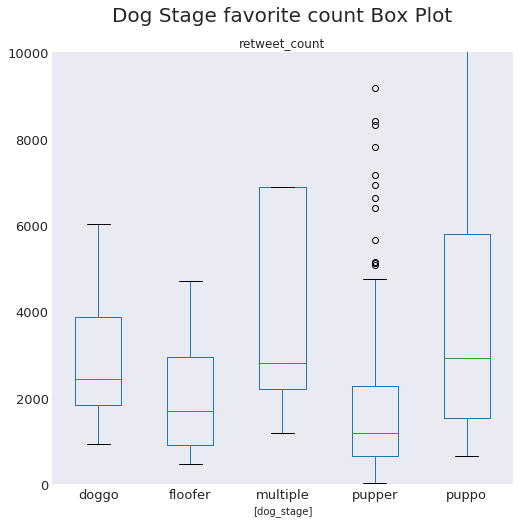

In [60]:
plt.figure()
we_rate_dog_tweet_df[we_rate_dog_tweet_df['dog_stage']!= ''].boxplot(column= ['retweet_count'], by= ['dog_stage'], grid= False, fontsize = 13, figsize = (8,8))
plt.ylim(0,10000)
plt.suptitle('Dog Stage favorite count Box Plot', fontsize=20)

plt.show()

<p style="color:green" >Interesting even though the pupper has most percenatge of our tweet (11.3%) , it's the least retweeted and tweet with multiple dog stage has the largest mean of 6275 retweet. </p>

In [61]:
dog_stage_mean_favorite = we_rate_dog_tweet_df.groupby('dog_stage').mean()['favorite_count']
dog_stage_mean_favorite 

dog_stage
doggo       13289.738095
floofer      5581.500000
multiple    18848.375000
pupper       6316.477419
puppo       14966.375000
Name: favorite_count, dtype: float64

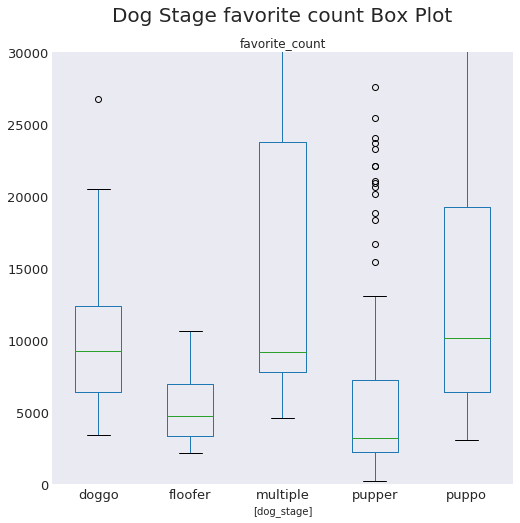

In [62]:
plt.figure()
we_rate_dog_tweet_df[we_rate_dog_tweet_df['dog_stage']!= ''].boxplot(column= ['favorite_count'], by= ['dog_stage'], grid= False, fontsize = 13, figsize = (8,8))
plt.ylim(0,30000)
plt.suptitle('Dog Stage favorite count Box Plot', fontsize=20)

plt.show()


<p style="color:green" >Interesting tweet with multiple satge has the largest favorite mean of 18848, so it seems that tweet with multiple satge tend to motive user to retweet and click favorite. Also, even though the puppo has percenatge of 1.17 % out from our tweet , it's  the most favorite  stage that has mean of 14966 likes compared to doggo, pupper and floofer might be the reason for this is that one image (funiest) can has huge number of favorite than others </p>